In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import scipy.io
import h5py
%matplotlib inline

In [2]:
# %tensorflow_version 1.x

In [3]:
Eigen_path = 'drive/My Drive/Colab Notebooks/project/data/stephens-2d-eigenworm-data/stephens-2011-data/EigenWorms.mat'
Footage_path = 'drive/My Drive/Colab Notebooks/project/data/stephens-2d-eigenworm-data/stephens-2011-data/20150814-All-PNAS2011-DataStitched .mat'

In [4]:
class EigenData(object):
    '''Represents the original experiment data.'''

    def __init__(self):
        self._eigenworms = None

    def get_eigenworms(self, eigen_path):
        '''
        Loads the matlab files from the original experiment and parses them
        into expected numpy formats.

        Eigenworms are stored as 100 'angles' at equidistributed coordinates
        down the body.
        '''
        # Load the matlab files into numpy arrays
        eigenworms = scipy.io.loadmat(eigen_path)
        self._eigenworms = eigenworms["EigenWorms"].transpose()
        return self._eigenworms

    def get_footage(self, footage_path):
        '''
        Loads the matlab files from the original experiment and parses them
        into expected numpy formats.

        Footage is stored as coefficients with respect to the eigenworm basis.
        '''
        f = h5py.File(footage_path, 'r')
        footage = {}
        for k, v in f.items():
            if k != 'tr':
                for k2, v2 in v.items():
                    if v2.shape == (5, 33600) or v2.shape == (6, 33600):
                        footage[k2] = np.array(v2)
        return footage

    def reconstruct(self, coefficients):
        '''
        Reconstruct multiple postures from basis coefficients to angles.
        '''
        n_basis_required = coefficients.shape[0]
        print(self._eigenworms[0:n_basis_required, :].transpose().shape,
              coefficients.shape)
        return self._eigenworms[0:n_basis_required, :].transpose() @ \
            coefficients

In [5]:
# if __name__ == "__main__":
data = EigenData()
Eigen_path = 'drive/My Drive/Colab Notebooks/project/data/stephens-2d-eigenworm-data/stephens-2011-data/EigenWorms.mat'
Footage_path = 'drive/My Drive/Colab Notebooks/project/data/stephens-2d-eigenworm-data/stephens-2011-data/20150814-All-PNAS2011-DataStitched .mat'
worm_data = data.get_eigenworms(Eigen_path)

footage = data.get_footage(Footage_path)
for k in footage.keys():
    print(k, footage[k].shape)
    r = data.reconstruct(footage[k])
    print('-->', r.shape)


b (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
c (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
d (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
e (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
f (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
g (6, 33600)
(100, 6) (6, 33600)
--> (100, 33600)
h (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
i (6, 33600)
(100, 6) (6, 33600)
--> (100, 33600)
j (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
k (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
l (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)
m (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)


### Example worm B

In [6]:
letter = 'm'
print(letter, footage[letter].shape)
rb = data.reconstruct(footage[letter])
print('-->', rb.shape)

m (5, 33600)
(100, 5) (5, 33600)
--> (100, 33600)


In [7]:
### All the data
raw_data = pd.DataFrame(rb)
raw_data = raw_data.dropna(axis=1)

### Normalise the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
all_shape = pd.DataFrame(scaler.fit_transform(raw_data))
raw_data = all_shape.T


In [20]:
raw_data.iloc[0].values

array([0.26682561, 0.24257753, 0.21629317, 0.1901903 , 0.16323718,
       0.13512956, 0.10925155, 0.08356163, 0.06316289, 0.04343686,
       0.0274693 , 0.01570573, 0.00702875, 0.00186396, 0.        ,
       0.0028903 , 0.00979313, 0.0185981 , 0.02959574, 0.04528536,
       0.06192301, 0.08151622, 0.1031355 , 0.12377117, 0.14689779,
       0.16925305, 0.19340202, 0.21754257, 0.23894123, 0.26040399,
       0.27795341, 0.29604473, 0.31257833, 0.32655993, 0.33798126,
       0.34874113, 0.35536194, 0.3619131 , 0.36457268, 0.36646601,
       0.36325588, 0.36030549, 0.35506266, 0.34761561, 0.33762352,
       0.32754575, 0.31509625, 0.30305386, 0.28863688, 0.27516634,
       0.26181199, 0.24770096, 0.23602994, 0.22283234, 0.21317196,
       0.20533367, 0.19825475, 0.19415065, 0.19184504, 0.19364962,
       0.19673806, 0.20459288, 0.21200626, 0.22519451, 0.2401727 ,
       0.25710746, 0.27904288, 0.30146223, 0.32662291, 0.35614201,
       0.38578363, 0.41776876, 0.45268082, 0.48741955, 0.52408

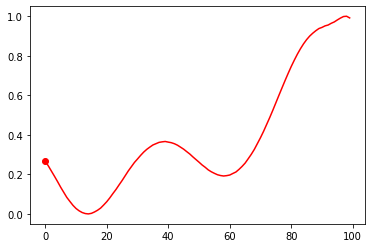

In [21]:
plt.plot(raw_data.iloc[0].values,'-o',c='red',markevery=[0])


In [22]:
### using 70% data as training set, 30% as test set
training = raw_data[:int(len(raw_data)*0.7)]
testing = raw_data[len(training):]


In [23]:
def create_dataset(data, n_prev = 50):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].values)
        docY.append(data.iloc[i+n_prev].values)
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

In [24]:
def train_test_split(df, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = int(round(len(df) * (1 - test_size)))

    X_train, y_train = create_dataset(df.iloc[0:ntrn])
    X_test, y_test = create_dataset(df.iloc[ntrn:])

    return (X_train, y_train), (X_test, y_test)

In [26]:
from numpy import array
from numpy import hstack
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [27]:
training_data = np.array(training.values)
testing_data = np.array(testing.values)

In [28]:
X_train, y_train = split_sequences(training_data,50)
X_test, y_test = split_sequences(testing_data,50)
n_features = X_train.shape[2]
n_steps = 50

In [32]:
X_train.shape , y_train.shape

((19895, 50, 100), (19895, 100))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout, Conv1D,MaxPooling1D, Flatten
import os
import tensorflow as tf
from tensorflow.compat.v1.keras.layers import CuDNNLSTM


### LSTM Autoencoder

In [ ]:
import numpy as np
import keras
from keras import Sequential
from keras.layers import Dense, RepeatVector,        TimeDistributed
from keras.layers import LSTM

N = 10000
data = np.random.uniform(-0.1, 0.1, size=(N, 500))
data = data.cumsum(axis=1)
window_size = 1
features = 500
data = data.reshape(N, window_size, features)

In [ ]:
data.shape

(10000, 1, 500)

In [ ]:
aaa = np.expand_dims(data[1,:,:],axis=0)
aaa.shape

(1, 1, 500)

### CNN

In [ ]:
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps,n_features)))
model1.add(Dropout(0.2))
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(Dropout(0.2))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(n_features, activation='linear'))
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

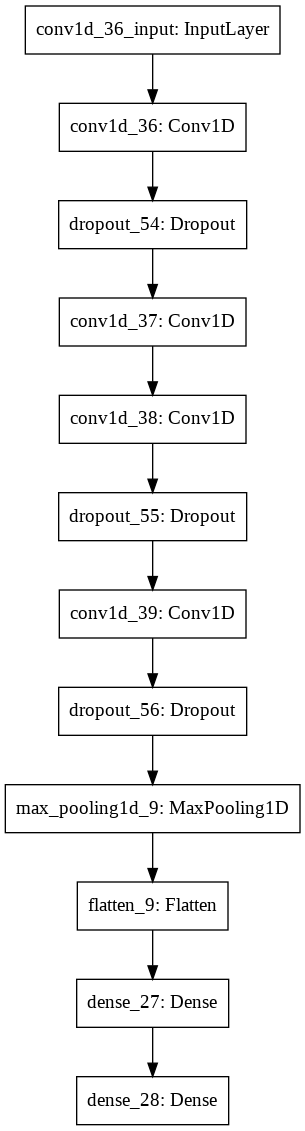

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model_plot_CNN.png')

In [ ]:
import time
start = time.time()
model1.fit(X_train, y_train, epochs=180, verbose=1)
end = time.time()
print(end - start)

Epoch 1/180
622/622 [==============================] - 2s 3ms/step - loss: 0.0336 - accuracy: 0.1061
Epoch 2/180
622/622 [==============================] - 2s 3ms/step - loss: 0.0096 - accuracy: 0.1849
Epoch 3/180
622/622 [==============================] - 2s 3ms/step - loss: 0.0075 - accuracy: 0.2112
Epoch 4/180
622/622 [==============================] - 2s 3ms/step - loss: 0.0062 - accuracy: 0.2363
Epoch 5/180
622/622 [==============================] - 2s 3ms/step - loss: 0.0058 - accuracy: 0.2446
Epoch 6/180
622/622 [==============================] - 2s 3ms/step - loss: 0.0053 - accuracy: 0.2610
Epoch 7/180
622/622 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.2632
Epoch 8/180
622/622 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.2740
Epoch 9/180
622/622 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.2764
Epoch 10/180
622/622 [==============================] - 2s 3ms/step - loss: 0.0043 - accura

In [ ]:
y_test.shape

(8499, 100)

In [ ]:
a_CNN = model1.predict(X_test)
a_CNN.shape

(8499, 100)

In [ ]:
four_CNN = int(len(a_CNN)/4)

pre1 = a_CNN[four_CNN]
pre2 = a_CNN[2*four_CNN]
pre3 = a_CNN[3*four_CNN]
predict_list_CNN = np.array([pre1,pre2,pre3])


rea1 = y_test[four_CNN]
rea2 = y_test[2*four_CNN]
rea3 = y_test[3*four_CNN]
real_list_CNN = np.array([rea1,rea2,rea3])

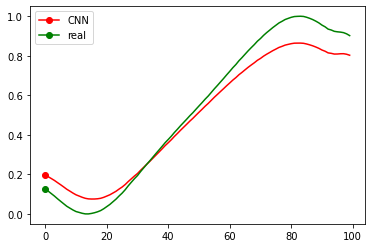

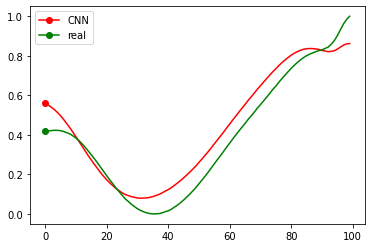

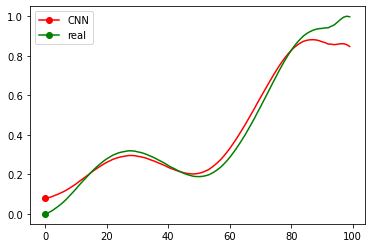

In [ ]:
for i in range(3):
  plt.plot(predict_list_CNN[i].T,'-o',c='red',markevery=[0], label='CNN')
  plt.plot(real_list_CNN[i].T,'-o',c='green',markevery=[0], label='real')
  plt.legend()
  plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

all_euc = []
all_mse = []
for i in range(y_test.shape[0]):
  dist = np.linalg.norm(y_test[i]- a_CNN[i])
  all_euc.append(dist)
  all_mse.append(mean_squared_error(y_test[i],a_CNN[i]))

average_eul = np.mean(all_euc)
average_mse = np.mean(all_mse)

print(average_eul)
print(average_mse)

0.7710382317578142
0.006427364038585727


### LSTM

In [ ]:
model = Sequential()  
L0 = CuDNNLSTM(260,input_shape=(n_steps, n_features),return_sequences=True)
model.add(L0)
L1 = CuDNNLSTM(260,return_sequences=True)
model.add(L1)  
model.add(Dropout(0.2))  
L2 = CuDNNLSTM(260,return_sequences=True)
model.add(L2)  
model.add(Dropout(0.2))  
L3 = CuDNNLSTM(260,return_sequences=False)
model.add(L3)  
model.add(Dropout(0.2))   
model.add(Dense(n_features))
A_out = Activation("linear")
model.add(A_out)  
model.compile(loss="mean_squared_error", optimizer="rmsprop",metrics=['accuracy'])  ######

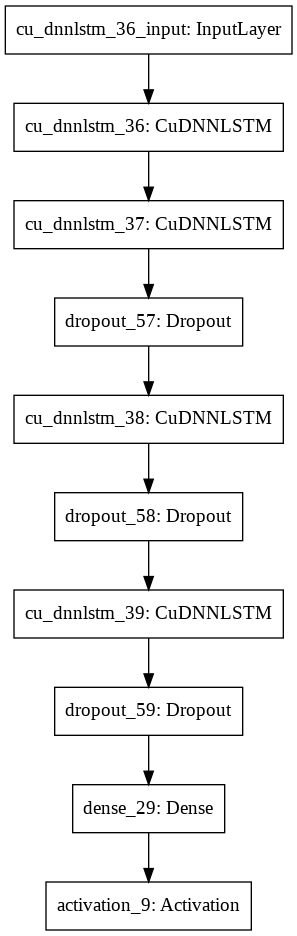

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot)lstm.png')

In [ ]:
import time
start = time.time()
model.fit(X_train, y_train, epochs=180, verbose=1)
end = time.time()
print(end - start)

Epoch 1/180
622/622 [==============================] - 16s 26ms/step - loss: 0.0276 - accuracy: 0.1135
Epoch 2/180
622/622 [==============================] - 13s 21ms/step - loss: 0.0062 - accuracy: 0.2118
Epoch 3/180
622/622 [==============================] - 13s 21ms/step - loss: 0.0042 - accuracy: 0.2727
Epoch 4/180
622/622 [==============================] - 13s 21ms/step - loss: 0.0034 - accuracy: 0.3181
Epoch 5/180
622/622 [==============================] - 13s 21ms/step - loss: 0.0029 - accuracy: 0.3658
Epoch 6/180
622/622 [==============================] - 13s 21ms/step - loss: 0.0026 - accuracy: 0.4061
Epoch 7/180
622/622 [==============================] - 13s 21ms/step - loss: 0.0024 - accuracy: 0.4341
Epoch 8/180
622/622 [==============================] - 13s 21ms/step - loss: 0.0022 - accuracy: 0.4699
Epoch 9/180
622/622 [==============================] - 13s 21ms/step - loss: 0.0021 - accuracy: 0.4795
Epoch 10/180
622/622 [==============================] - 13s 21ms/step - l

In [ ]:
a = model.predict(X_test)
a.shape

(8499, 100)

In [ ]:
four_LSTM = int(len(a)/4)

pre11 = a[four_LSTM]
pre22 = a[2*four_LSTM]
pre33 = a[3*four_LSTM]
predict_list_LSTM = np.array([pre11,pre22,pre33])


rea11 = y_test[four_LSTM]
rea22 = y_test[2*four_LSTM]
rea33 = y_test[3*four_LSTM]
real_list_LSTM = np.array([rea11,rea22,rea33])

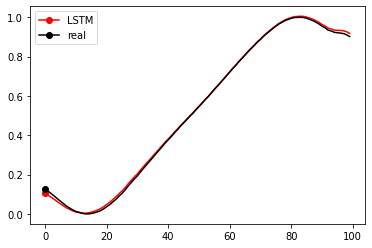

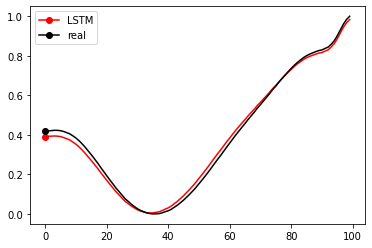

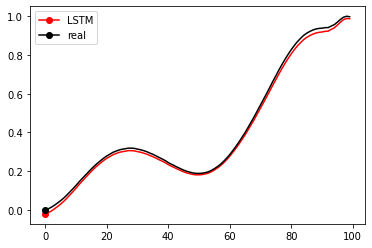

In [ ]:
for i in range(3):
  plt.plot(predict_list_LSTM[i].T,'-o',c='red',markevery=[0], label='LSTM')
  plt.plot(real_list_LSTM[i].T,'-o',c='black',markevery=[0], label='real')
  plt.legend()
  plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

all_euc_lstm = []
all_mse_lstm = []
for i in range(y_test.shape[0]):
  dist = np.linalg.norm(y_test[i]- a[i])
  all_euc_lstm.append(dist)
  all_mse_lstm.append(mean_squared_error(y_test[i],a[i]))

average_eul = np.mean(all_euc_lstm)
average_mse = np.mean(all_mse_lstm)

print(average_eul)
print(average_mse)

0.11842254614896425
0.00018987920799782177


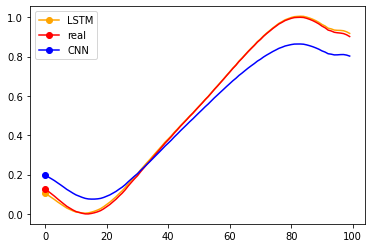

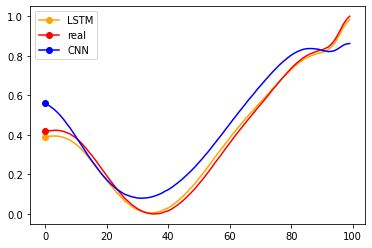

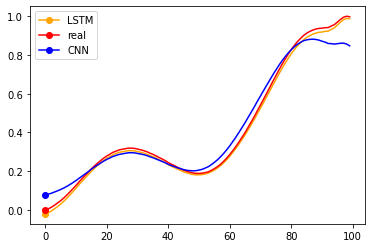

In [ ]:
for i in range(3):
  plt.plot(predict_list_LSTM[i].T,'-o',c='orange',markevery=[0], label='LSTM')
  plt.plot(real_list_LSTM[i].T,'-o',c='red',markevery=[0], label='real')
  plt.plot(predict_list_CNN[i].T,'-o',c='blue',markevery=[0], label='CNN')
  plt.legend()
  plt.show()